# Text / Data Vectorization Practical:


- kaggle dataset: [email-spam-detection dataset 🔗](https://www.kaggle.com/datasets/venky73/spam-mails-dataset/data)

In [9]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv(os.path.join('datasets', 'spam_ham_dataset.csv'))
data.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
data.groupby('label').describe()

Unnamed: 0                                                         \
           count    mean          std     min      25%     50%      75%   
label                                                                     
ham       3672.0  1835.5  1060.159422     0.0   917.75  1835.5  2753.25   
spam      1499.0  4421.0   432.868340  3672.0  4046.50  4421.0  4795.50   

              label_num                                     
          max     count mean  std  min  25%  50%  75%  max  
label                                                       
ham    3671.0    3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
spam   5170.0    1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [13]:
print(data['text'][4])

Subject: re : indian springs
this deal is to book the teco pvr revenue . it is my understanding that teco
just sends us a check , i haven ' t received an answer as to whether there is a
predermined price associated with this deal or if teco just lets us know what
we are giving . i can continue to chase this deal down if you need .


<Axes: xlabel='label', ylabel='count'>

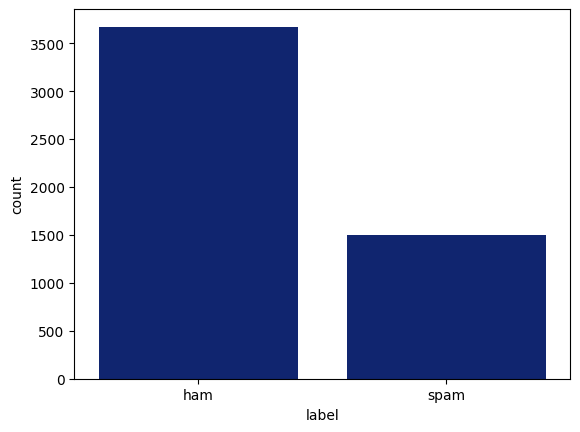

In [24]:
sns.set_palette("dark", 2)
sns.countplot(x='label', data=data)

In [26]:
from transformers import AutoTokenizer, AutoModel

# Vectorizing the Text Data:


class Preprocessor:
    
    def __init__(self, model_name: str = 'bert-base-uncased'):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name)
    
    
    def encoder(self, text:str):
        try:
            if not text or not isinstance(text, str):
                raise ValueError("Input should be non-empty str...")

            encoded_data = self.tokenizer(
                text, return_tensors = 'pt'
            )
            
            return encoded_data['input_ids'], encoded_data['attention_mask']
        except ValueError as e:
            print(f"Value Error: {e}")
    
    def decoder(self, vector):
        
        try:
            return self.tokenizer.decode(vector[0])
        except ValueError as e:
            print(f"Value Error : {e}")

In [29]:
preprocessor = Preprocessor()

data['vectorized_data'] = data.text.apply(lambda x: preprocessor.encoder(x))

Token indices sequence length is longer than the specified maximum sequence length for this model (565 > 512). Running this sequence through the model will result in indexing errors


In [34]:
# Data is vectorized using BERT Model...

data['vectorized_data'][5]

(tensor([[  101,  3395,  1024, 15501,  4948,  4179,  4773,  4769,  2689,  2023,
           4471,  2003,  3832,  2005, 15501,  4948,  4179,  5198,  2069,  1012,
           2349,  2000,  1037,  3522,  2689,  2000, 15501,  4948,  4179,  1010,
           1996, 24471,  2140,  1006,  9875,  1000,  4773,  4769,  1000,  1007,
           2005,  3229,  2075, 15501,  4948,  4179,  3791,  2000,  2022,  2904,
           2006,  2115,  3274,  1012,  1996,  2689,  7336,  5815,  1996,  3661,
           1000,  1055,  1000,  2000,  1996,  1000,  8299,  1000,  4431,  1999,
           1996, 24471,  2140,  1012,  1996, 24471,  2140,  2005,  3229,  2075,
          15501,  4948,  4179,  2323,  2022,  1024, 16770,  1024,  1013,  1013,
          15501,  4948,  4179,  1012,  4372,  4948,  1012,  4012,  1012,  2023,
           2689,  2323,  2022,  2081,  2011,  2216,  2040,  2031,  2794,  1996,
          24471,  2140,  2004,  1037,  5440,  2006,  1996, 16602,  1012,   102]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [37]:
# Let's decode any one sample

decoded_data = preprocessor.decoder(data['vectorized_data'][5][0])
print(decoded_data)

[CLS] subject : ehronline web address change this message is intended for ehronline users only. due to a recent change to ehronline, the url ( aka " web address " ) for accessing ehronline needs to be changed on your computer. the change involves adding the letter " s " to the " http " reference in the url. the url for accessing ehronline should be : https : / / ehronline. enron. com. this change should be made by those who have added the url as a favorite on the browser. [SEP]


---
By Kirtan Ghelani @SculptSoft